In [1]:
import pathlib
import PIL.Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

dados_dir = pathlib.Path("uvas/")
len(list(dados_dir.glob("*/*.JPG"))) 
pastas = [pasta.name for pasta in dados_dir.iterdir() if pasta.is_dir()]    
blackMeasles = list(dados_dir.glob("BlackMeasles/*"))
print(pastas)

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']


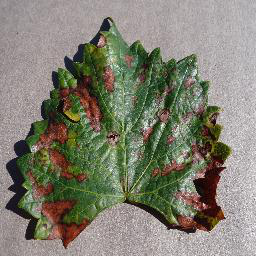

In [2]:
PIL.Image.open(str(blackMeasles[0]))

In [3]:
for pasta in pastas:
    path = dados_dir / pasta  
    imagens = list(path.glob("*.JPG")) #+ list(path.glob("*.jpg"))
    print(f"Classes {pasta} tem {len(imagens)} imagens")
    if imagens:
        img = PIL.Image.open(imagens[0]) 
        img_array = np.array(img) 
        print(f"A primeira imagem em {pasta}: {img_array.shape}")
    else:
        print(f"Nenhuma imagem encontrada na classe {pasta}")

Classes BlackMeasles tem 400 imagens
A primeira imagem em BlackMeasles: (256, 256, 3)
Classes BlackRot tem 400 imagens
A primeira imagem em BlackRot: (256, 256, 3)
Classes HealthyGrapes tem 400 imagens
A primeira imagem em HealthyGrapes: (256, 256, 3)
Classes LeafBlight tem 400 imagens
A primeira imagem em LeafBlight: (256, 256, 3)


In [4]:
batch_size= 64
altura= 256
largura=256

In [5]:
treino = tf.keras.utils.image_dataset_from_directory(
    dados_dir,
    validation_split= 0.2,
    subset="training",
    seed = 568,
    image_size=(altura,largura),
    batch_size = batch_size
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


In [6]:
validacao = tf.keras.utils.image_dataset_from_directory(
    dados_dir,
    validation_split= 0.2,
    subset="validation",
    seed = 568,
    image_size=(altura,largura),
    batch_size = batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


In [7]:
treino.class_names
tf.random.set_seed(424242)

In [8]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)), 
    tf.keras.layers.Rescaling(1.255),  
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation=tf.nn.relu),    
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)    
])
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
epocas = 10
history = modelo.fit(
    treino,
    validation_data = validacao,
    epochs =epocas
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.2472 - loss: 36964.1953 - val_accuracy: 0.4844 - val_loss: 8827.6787
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.4234 - loss: 7054.6997 - val_accuracy: 0.5250 - val_loss: 1782.8356
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - accuracy: 0.6034 - loss: 1332.4264 - val_accuracy: 0.6187 - val_loss: 993.3461
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 0.6550 - loss: 1033.0469 - val_accuracy: 0.6687 - val_loss: 894.8402
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.7031 - loss: 674.9549 - val_accuracy: 0.7000 - val_loss: 783.2371
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.6754 - loss: 939.3516 - val_accuracy: 0.7344 - val_loss: 461.5955
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.7459 - loss: 553.4448 - val_accuracy: 0.7094 - val_loss: 748.3256
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.796

In [10]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,499,406 (288.01 MB)

 Trainable params: 25,166,468 (96.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,332,938 (192.00 MB)

In [11]:
def plot_resultados(history, epocas):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    val_loss= history.history["val_loss"]
    intervalo_epocas= range(epocas)
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(intervalo_epocas, acc, "r", label="Acurácia de Treino")
    plt.plot(intervalo_epocas, val_acc, "b", label="Acurácia de Validação")
    plt.legend(loc="lower right")
    plt.subplot(1,2,2)
    plt.plot(intervalo_epocas, acc, "r", label="Perda do Treino")
    plt.plot(intervalo_epocas, val_acc, "b", label="Perda da Validação")
    plt.legend(loc= "upper right")
    plt.show()

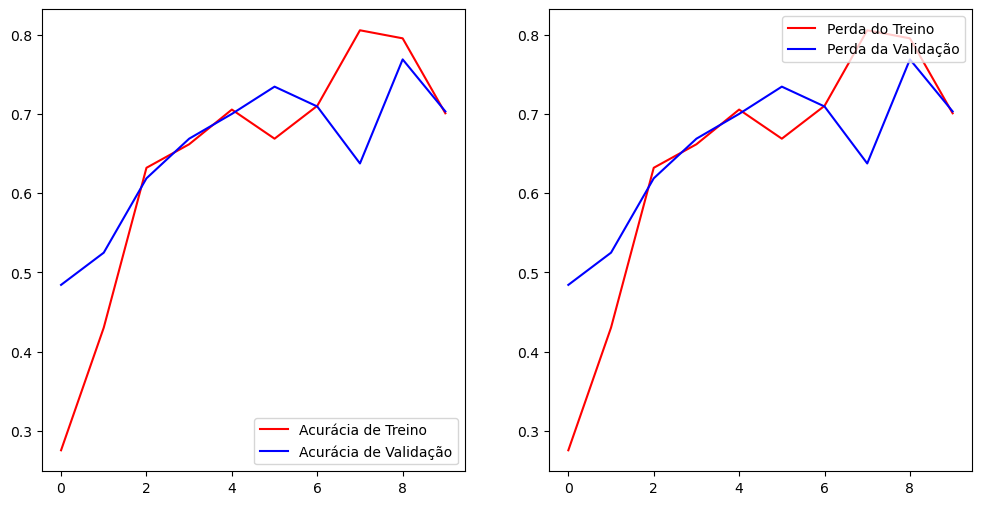

In [12]:
plot_resultados(history, epocas)

In [13]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)), 
    tf.keras.layers.Rescaling(1.255),
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation=tf.nn.relu),    
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)    
])
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
epocas = 10
history = modelo.fit(
    treino,
    validation_data = validacao,
    epochs =epocas
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 663ms/step - accuracy: 0.2724 - loss: 2000.0995 - val_accuracy: 0.3344 - val_loss: 1.2795
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 677ms/step - accuracy: 0.4351 - loss: 1.1541 - val_accuracy: 0.4750 - val_loss: 1.1889
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 643ms/step - accuracy: 0.7113 - loss: 0.8337 - val_accuracy: 0.5125 - val_loss: 1.3291
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 639ms/step - accuracy: 0.8990 - loss: 0.3155 - val_accuracy: 0.6219 - val_loss: 1.7850
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 643ms/step - accuracy: 0.9859 - loss: 0.0605 - val_accuracy: 0.6219 - val_loss: 1.3809
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 637ms/step - accuracy: 0.9979 - loss: 0.0191 - val_accuracy: 0.6750 - val_loss: 2.1390
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 681ms/step - accuracy: 0.9973 - loss: 0.0064 - val_accuracy: 0.6562 - val_loss: 1.6164
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 643ms/step - accuracy: 1.0000 - loss: 0.0014 - val_a

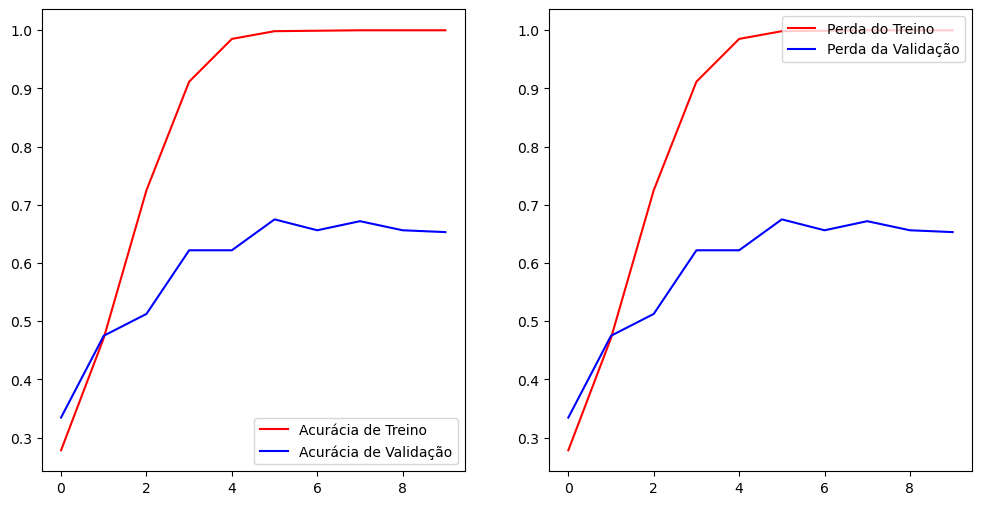

In [15]:
plot_resultados(history, epocas)

In [16]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

In [17]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get("accuracy")>=0.93):
            print("\n Alcançamos 93% de acuracia. Treino encerrado")
            self.model.stop_training = True

callbacks = myCallback()

In [18]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)), 
    tf.keras.layers.Rescaling(1.255),
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation=tf.nn.relu),    
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)    
])
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
epocas = 10
history = modelo.fit(
    treino,
    validation_data = validacao,
    epochs =epocas,
    callbacks=[callbacks]
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 652ms/step - accuracy: 0.2786 - loss: 2565.7141 - val_accuracy: 0.4125 - val_loss: 1.9069
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 651ms/step - accuracy: 0.5377 - loss: 1.3127 - val_accuracy: 0.4781 - val_loss: 1.2105
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 650ms/step - accuracy: 0.8681 - loss: 0.5175 - val_accuracy: 0.6000 - val_loss: 1.1188
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.9778 - loss: 0.1194
 Alcançamos 93% de acuracia. Treino encerrado
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 640ms/step - accuracy: 0.9778 - loss: 0.1184 - val_accuracy: 0.6594 - val_loss: 1.3579


In [20]:
data_augmentation= tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05)
])

In [21]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)), 
    data_augmentation,
    tf.keras.layers.Rescaling(1.255),
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32,(3,3), activation="relu"), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation=tf.nn.relu),    
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)    
])
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
epocas = 50
history = modelo.fit(
    treino,
    validation_data = validacao,
    epochs =epocas,
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 674ms/step - accuracy: 0.2915 - loss: 1349.3458 - val_accuracy: 0.3844 - val_loss: 1.8924
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 669ms/step - accuracy: 0.4028 - loss: 1.4051 - val_accuracy: 0.4594 - val_loss: 1.1050
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 675ms/step - accuracy: 0.5475 - loss: 1.0209 - val_accuracy: 0.6375 - val_loss: 0.8067
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 669ms/step - accuracy: 0.7210 - loss: 0.7338 - val_accuracy: 0.7625 - val_loss: 0.7151
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 673ms/step - accuracy: 0.7927 - loss: 0.6158 - val_accuracy: 0.6531 - val_loss: 1.0034
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 661ms/step - accuracy: 0.8331 - loss: 0.4347 - val_accuracy: 0.6969 - val_loss: 0.9761
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 672ms/step - accuracy: 0.8659 - loss: 0.3743 - val_accuracy: 0.7375 - val_loss: 0.8657
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 726ms/step - accuracy: 0.8871 - loss: 0.3063 - val_a

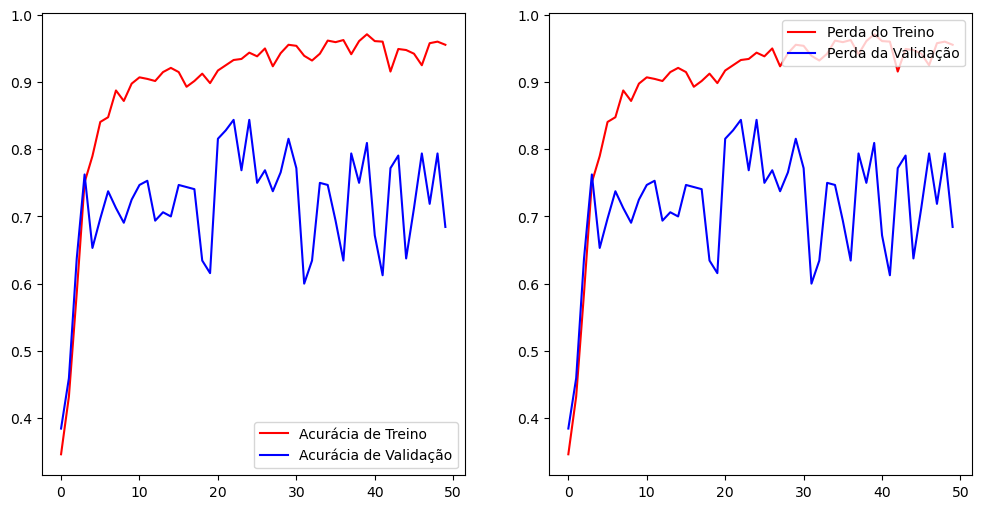

In [23]:
plot_resultados(history, epocas)

In [24]:
modelo.save("Modelo_aumento.h5")

In [25]:
input_shape = (256, 256, 3)

In [26]:
modelo_base = tf.keras.applications.InceptionV3(input_shape=input_shape,include_top=False,weights='imagenet')

In [27]:
modelo_base.trainable = False

In [28]:
rescaling = tf.keras.layers.Rescaling((1./255))
treino = treino.map(lambda x, y: (rescaling(x), y))
validacao = validacao.map(lambda x, y: (rescaling(x), y))

In [29]:
ultima_camada = modelo_base.get_layer('mixed7')
print("ultima_camada", ultima_camada.output)

ultima_camada <KerasTensor shape=(None, 14, 14, 768), dtype=float32, sparse=False, name=keras_tensor_265>


In [30]:
ultima_camada = modelo_base.output
x = tf.keras.layers.Flatten()(ultima_camada)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)
modelo = tf.keras.Model(inputs=modelo_base.input, outputs=x)

In [31]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
                    loss = 'sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [32]:
epocas = 20
history = modelo.fit(
    treino,
    validation_data = validacao,
    epochs =epocas,
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5331 - loss: 30.0208 - val_accuracy: 0.9250 - val_loss: 2.0122
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9424 - loss: 1.7291 - val_accuracy: 0.9656 - val_loss: 0.6187
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9794 - loss: 0.1709 - val_accuracy: 0.9656 - val_loss: 0.4290
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9842 - loss: 0.1322 - val_accuracy: 0.9719 - val_loss: 0.3015
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9982 - loss: 0.0198 - val_accuracy: 0.9750 - val_loss: 0.2347
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9968 - loss: 0.0080 - val_accuracy: 0.9719 - val_loss: 0.2949
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9984 - loss: 0.0019 - val_accuracy: 0.9750 - val_loss: 0.2272
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9973 - loss: 0.0472 - val_accuracy: 0.9781 - val_loss

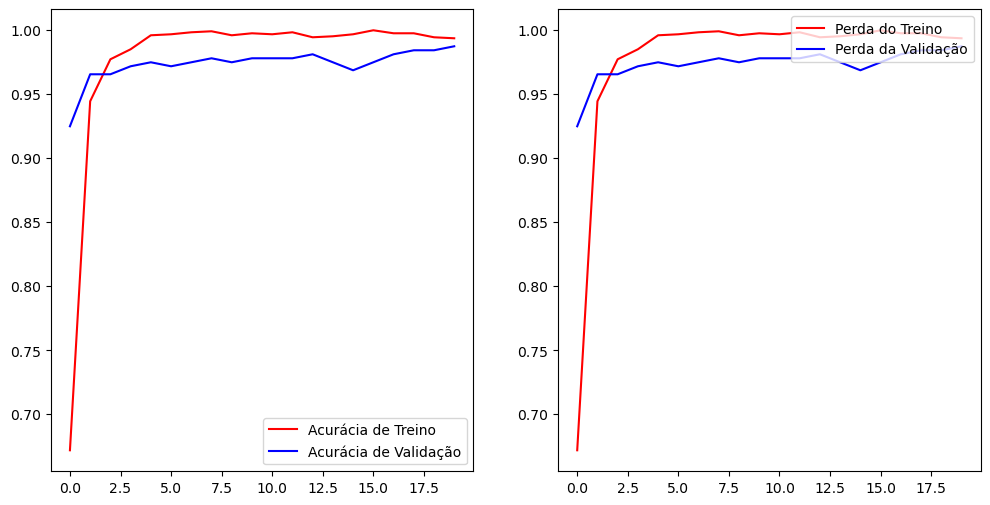

In [33]:
plot_resultados(history, epocas)

In [34]:
#modelo.save("Modelo_transferido_Sem_otmz.h5")

In [35]:
#modelo.save("Modelo_transferido_final.h5", include_optimizer= False)

In [36]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
modelo_tflite_quantizado = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Cr0l3y\AppData\Local\Temp\tmp_1cc1uw8\assets


INFO:tensorflow:Assets written to: C:\Users\Cr0l3y\AppData\Local\Temp\tmp_1cc1uw8\assets


Saved artifact at 'C:\Users\Cr0l3y\AppData\Local\Temp\tmp_1cc1uw8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_37')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1926273443088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1926273442128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1926273443856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1926273444240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1926273445584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1926273444432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1926273445968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1926273446160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1926273447120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1926273442320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1

In [37]:
with open('modelo_quantizado16bits.tflite', 'wb') as f:
    f.write(modelo_tflite_quantizado)